# Examine the temporal dynamics over the training

In [1]:
import meta
meta.split_gpu(which_gpu=2)

import os
import examine
import pandas as pd

# Shared pretraining from SGD

In [2]:
pretrain_epoch = 1000


In [5]:
def setting_to_run_path(pretrain_epoch, tf_root='/home/jal21012/triangle_model'):
    """Convert hyperparameters setting to a run path."""
    batch_name = f'share_pretrain_adam_lock_bias'
    pretraining_epochs = [0, 1, 10, 100, 500, 1000]
    run_sn = pretraining_epochs.index(pretrain_epoch)
    run_folder = f'{batch_name}_r{run_sn:04d}'
    return os.path.join(tf_root, 'models', batch_name, run_folder, 'model_config.json')

In [6]:
cfg_path = setting_to_run_path(pretrain_epoch)
cfg = meta.Config.from_json(cfg_path)
exam = examine.Examine(cfg)


Loaded config from /home/jal21012/triangle_model/models/share_pretrain_adam_lock_bias/share_pretrain_adam_lock_bias_r0005/model_config.json


[None, None, None, None, None]

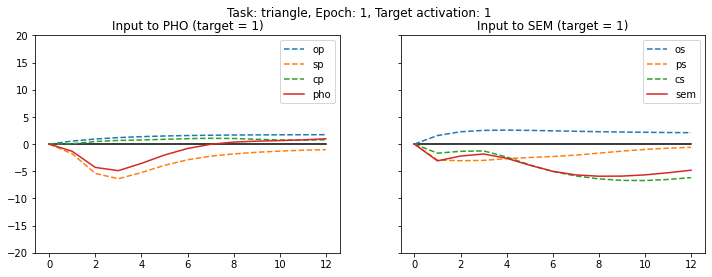

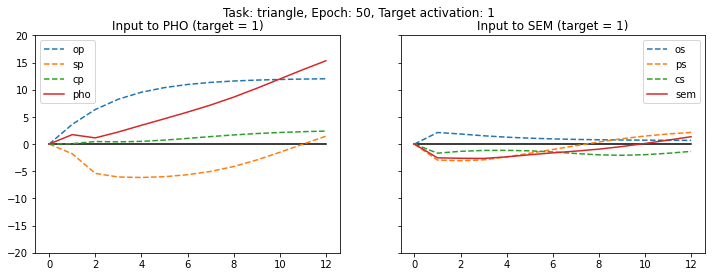

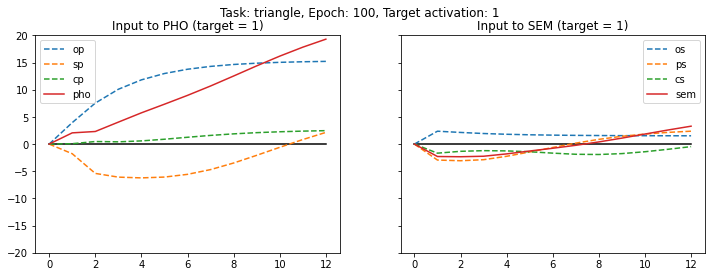

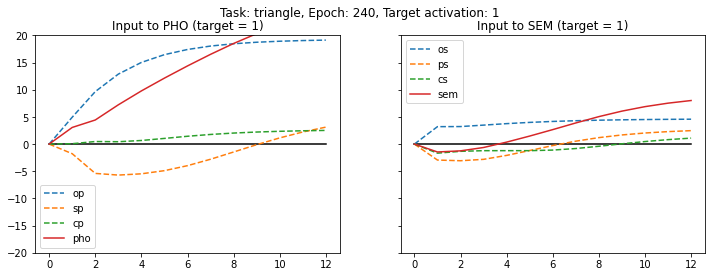

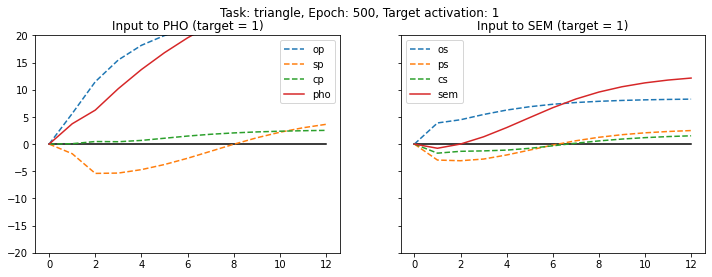

In [7]:
sel_epochs = [1, 50, 100, 240, 500]
[exam.plot_input(task='triangle', epoch=x, act=1) for x in sel_epochs]

- Direct path dominates in ON nodes

[None, None, None, None, None]

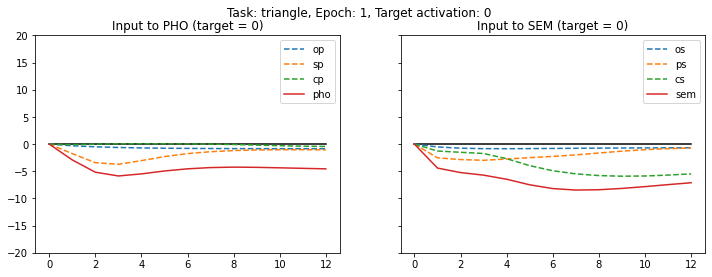

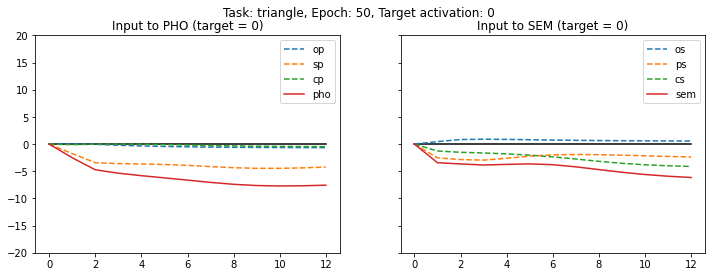

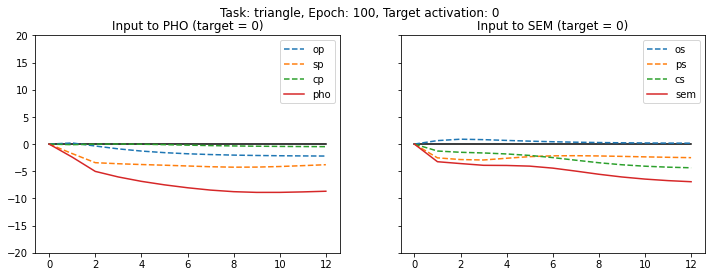

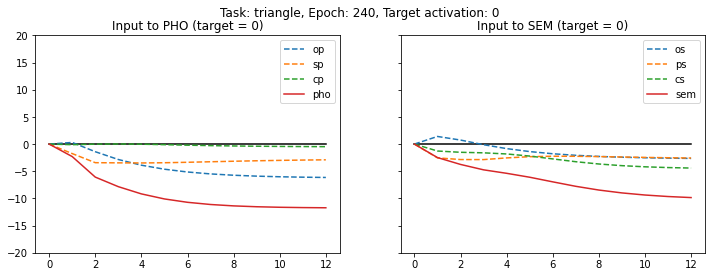

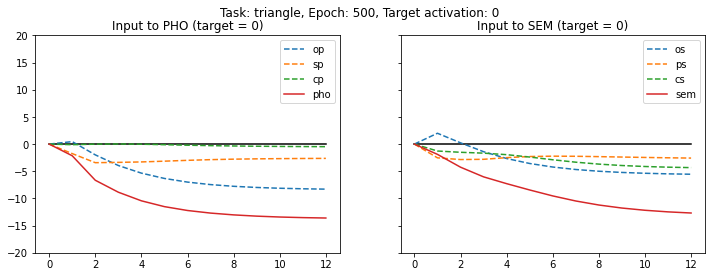

In [8]:
[exam.plot_input(task='triangle', epoch=x, act=0) for x in sel_epochs]

### Look at predicted phonemes

OP

In [9]:
df = pd.read_csv(f"{cfg.eval_folder}/train_r100_ort_pho.csv")
print(df.loc[(df.timetick==12) & (df.epoch==300) & (df.acc==0), 'pho_pred'].sample(10))

48013    _blur_____
48048    __pIkss___
48008    _kJOn_____
48044    __red_____
48051    __w^np____
48099    __fYdzz___
48060    _grApt____
48031    _fl@sks___
48037    __dElts___
48085    skr@mp____
Name: pho_pred, dtype: object


OSP

In [10]:
df = pd.read_csv(f"{cfg.eval_folder}/train_r100_exp_osp.csv")
print(df.loc[(df.timetick==12) & (df.epoch==300) & (df.acc==0), 'pho_pred'].sample(10))

48084    __gad_____
48002    __dab_____
48055    __gam_____
48008    __JWn_____
48005    __Jam_____
48085    __Jam_____
48052    ___an_____
48059    __ganz____
48006    __dan_____
48022    __Jaw_____
Name: pho_pred, dtype: object
